In [87]:
import numpy as np 
import pandas as pd # Data Manipulation
import seaborn as sns # Data Viz
import plotly.express as px
import matplotlib.pyplot as plt # data Visualiza
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)


## Preprocessing

In [88]:
df=pd.read_csv("loan_data.csv")

In [89]:
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [90]:
df.isnull().sum()


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [91]:
df.duplicated().sum()


np.int64(0)

In [92]:
df.dtypes


person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [93]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_columns.remove('loan_status')
numerical_columns

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [94]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [95]:
def plot_numerical(data,columns):
    plt.figure(figsize=(12,14))

    for i,j in enumerate(columns):
        plt.subplot(4,2,i+1) 
        sns.histplot(df[j], kde=True, bins=30, color='green')
        plt.title(j.replace('_',' '))
    plt.tight_layout()
    plt.show()

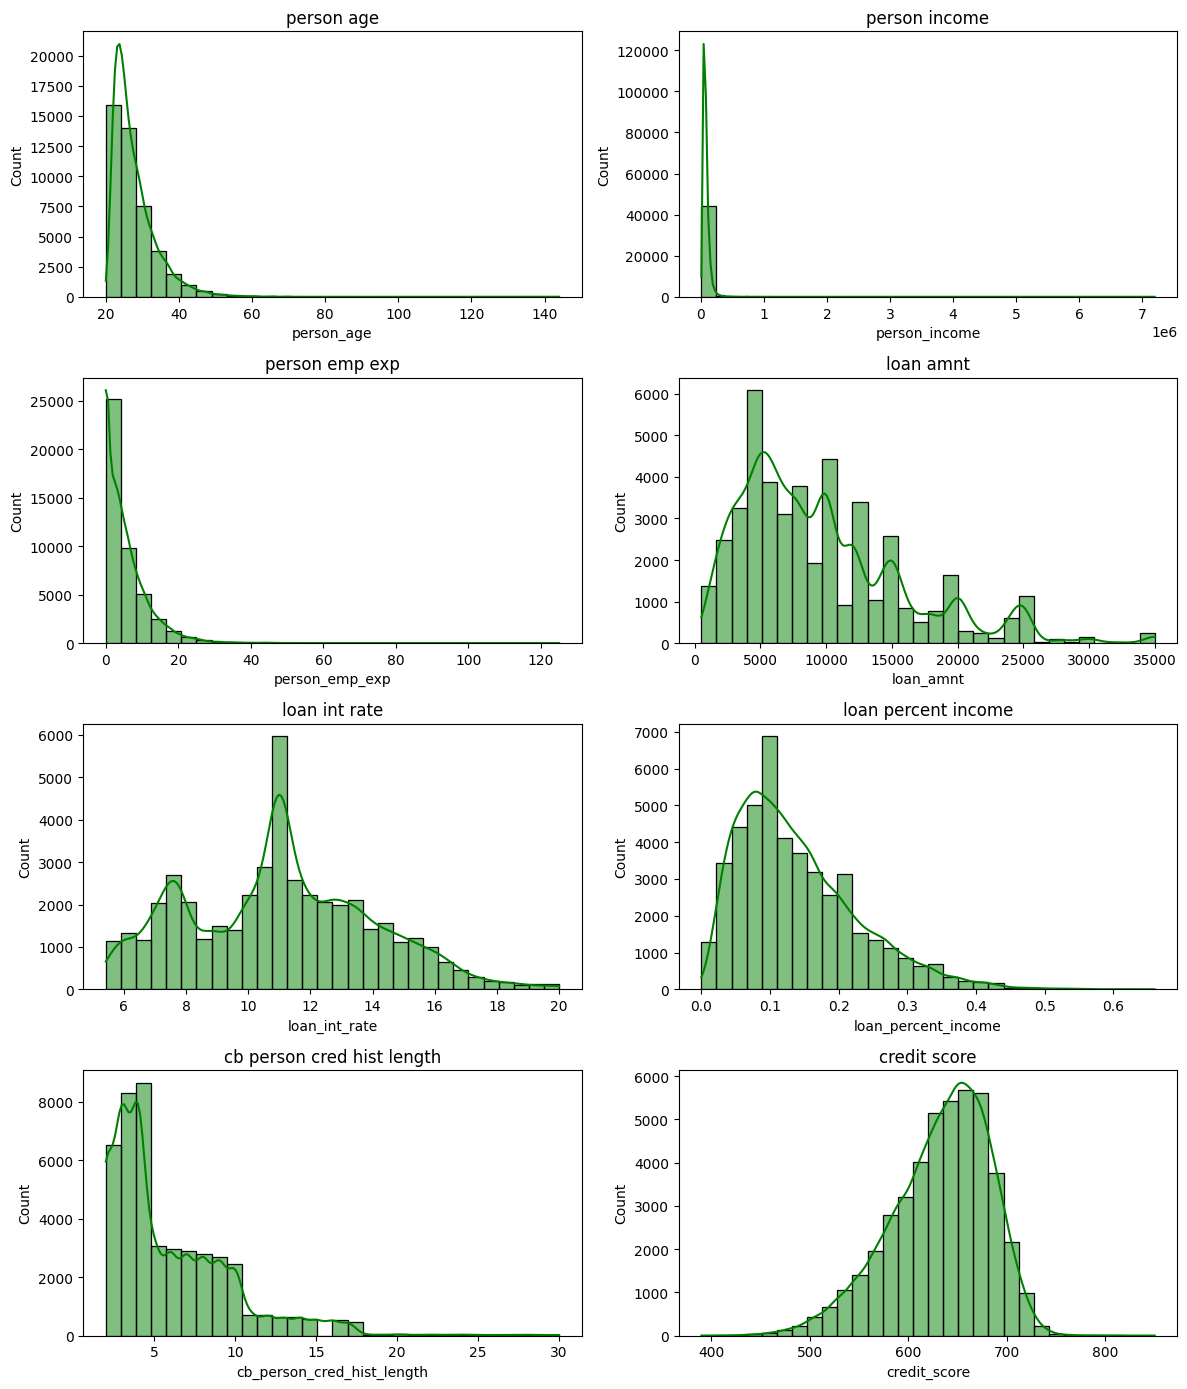

In [96]:
plot_numerical(df, numerical_columns)


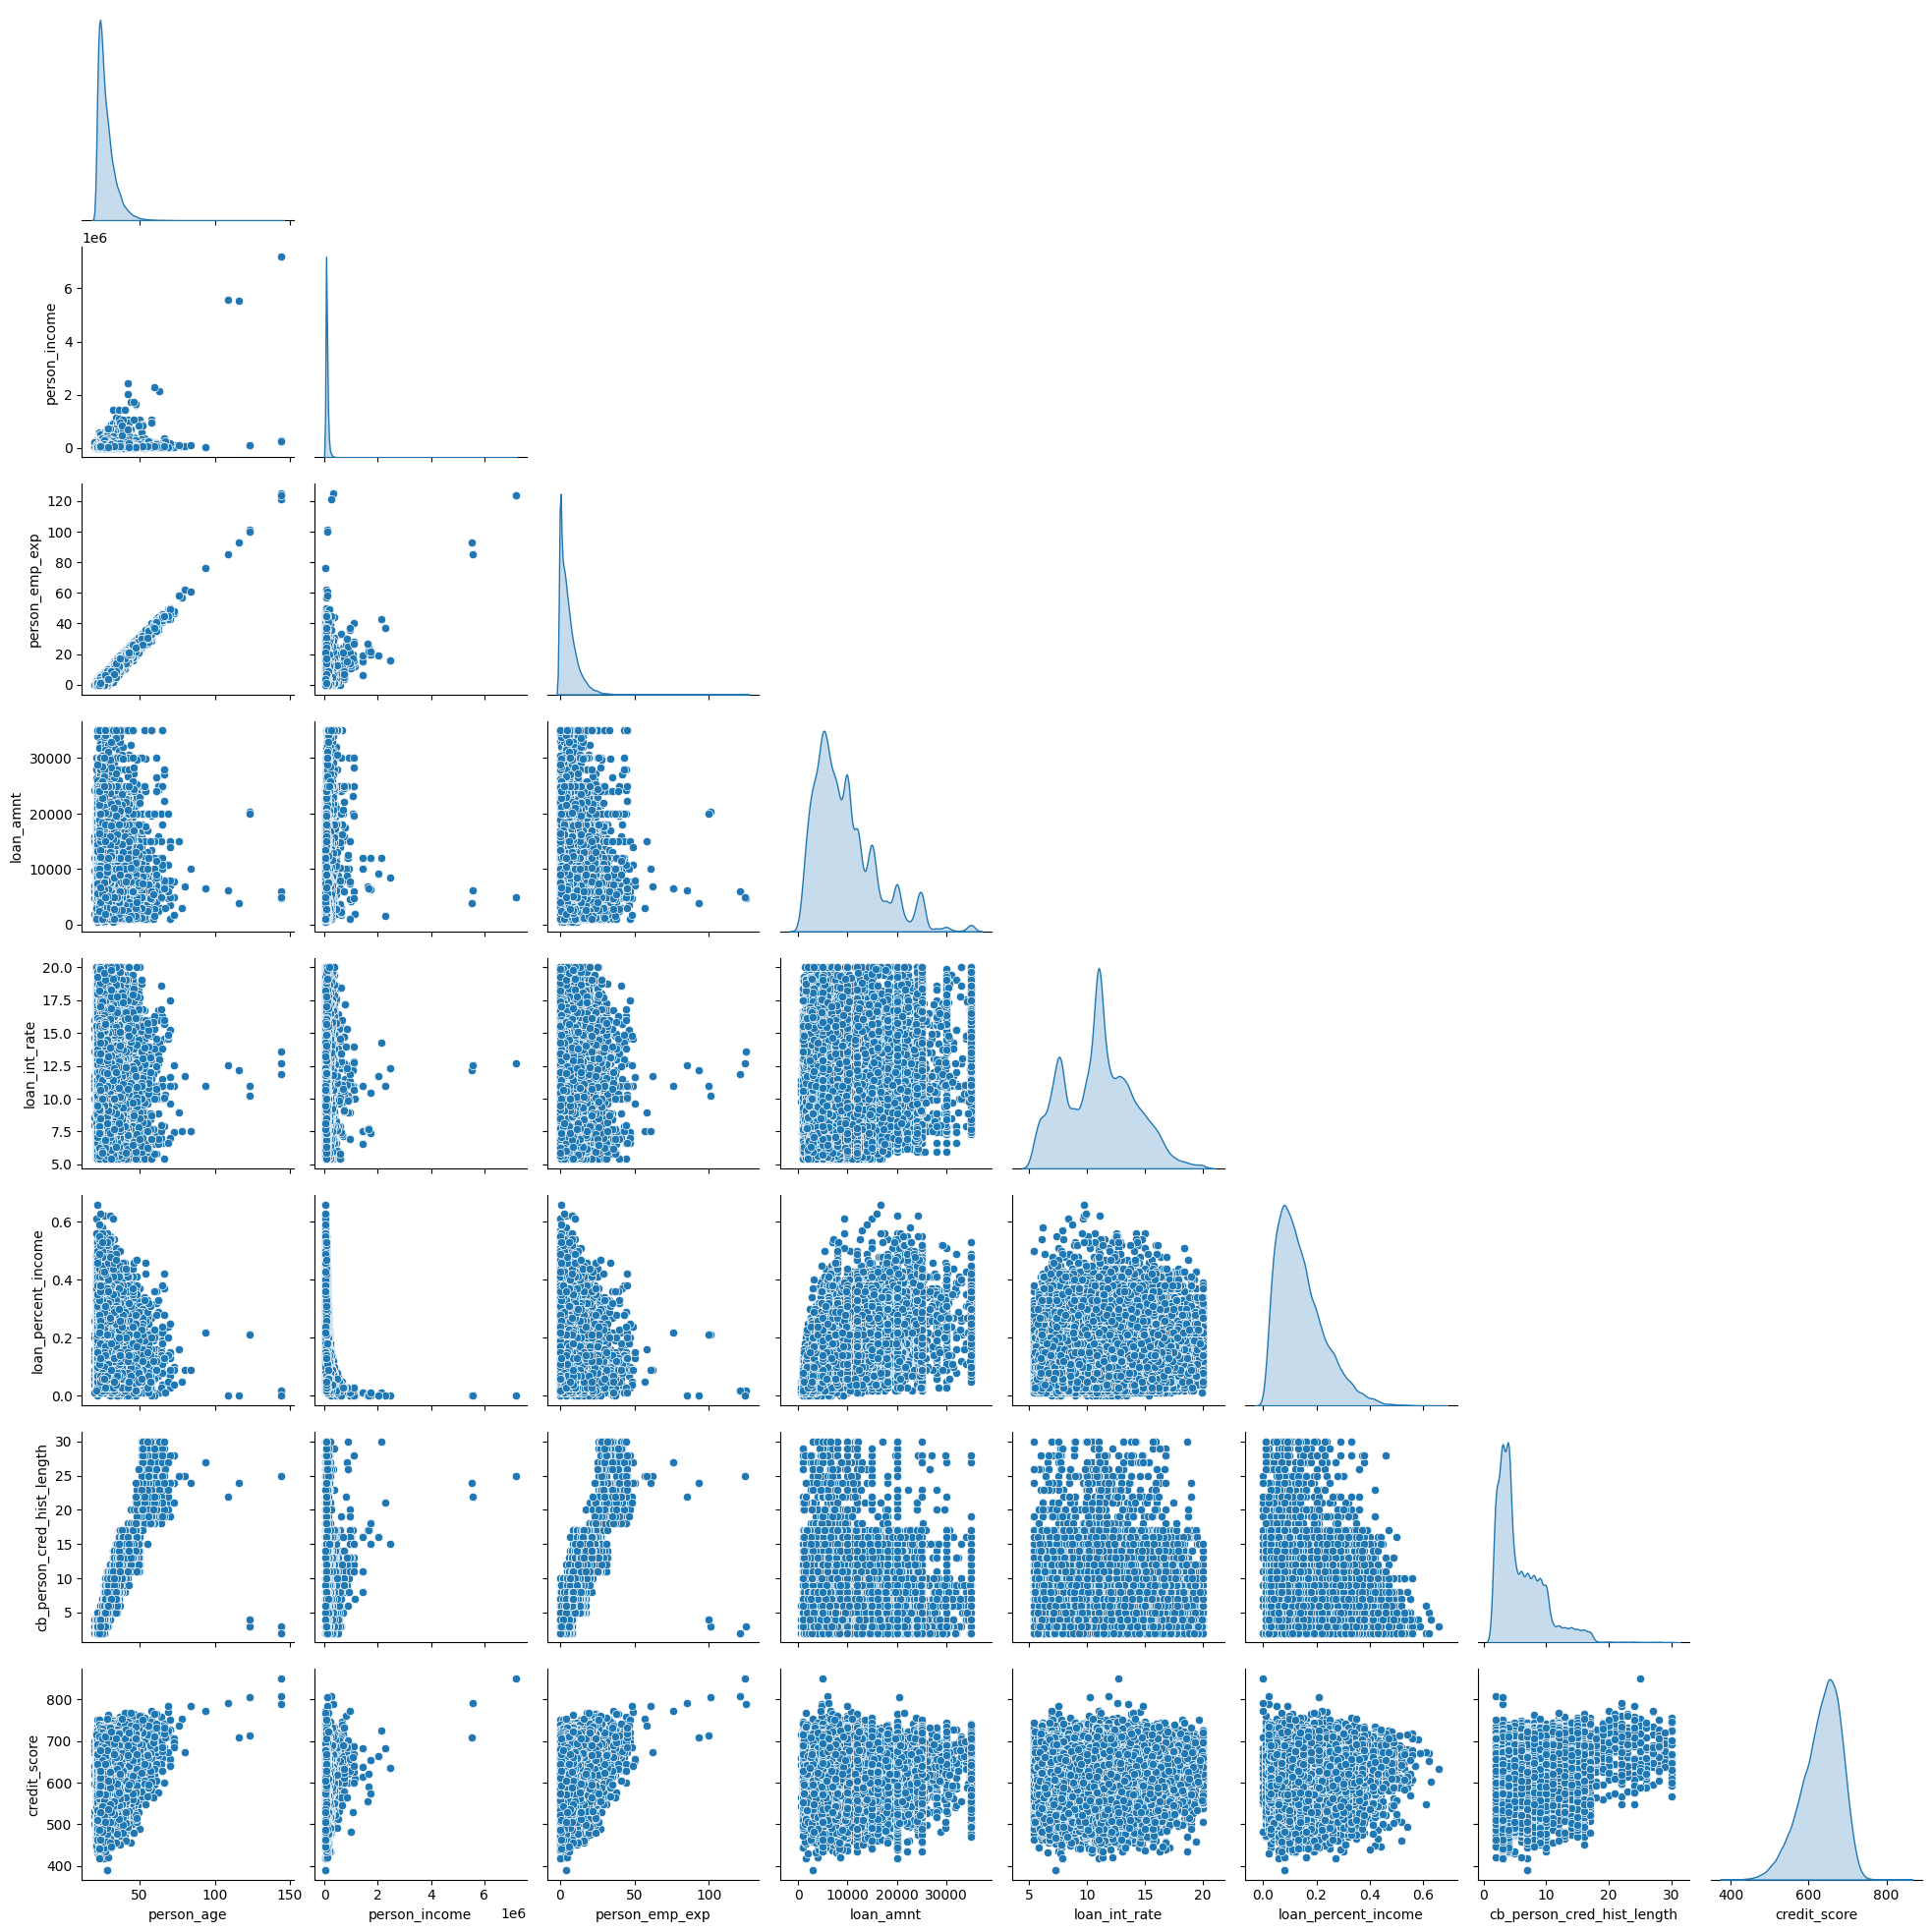

In [97]:
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)

plt.show()

In [98]:
def plot_Histcategorical(data,columns):
    plt.figure(figsize=(12,14))

    for i,j in enumerate(columns):
        plt.subplot(7,1,i+1)
        sns.countplot(y=j, data=df, palette='Greens')
        plt.title(j.replace('_',' '))
    plt.tight_layout()
    plt.show()

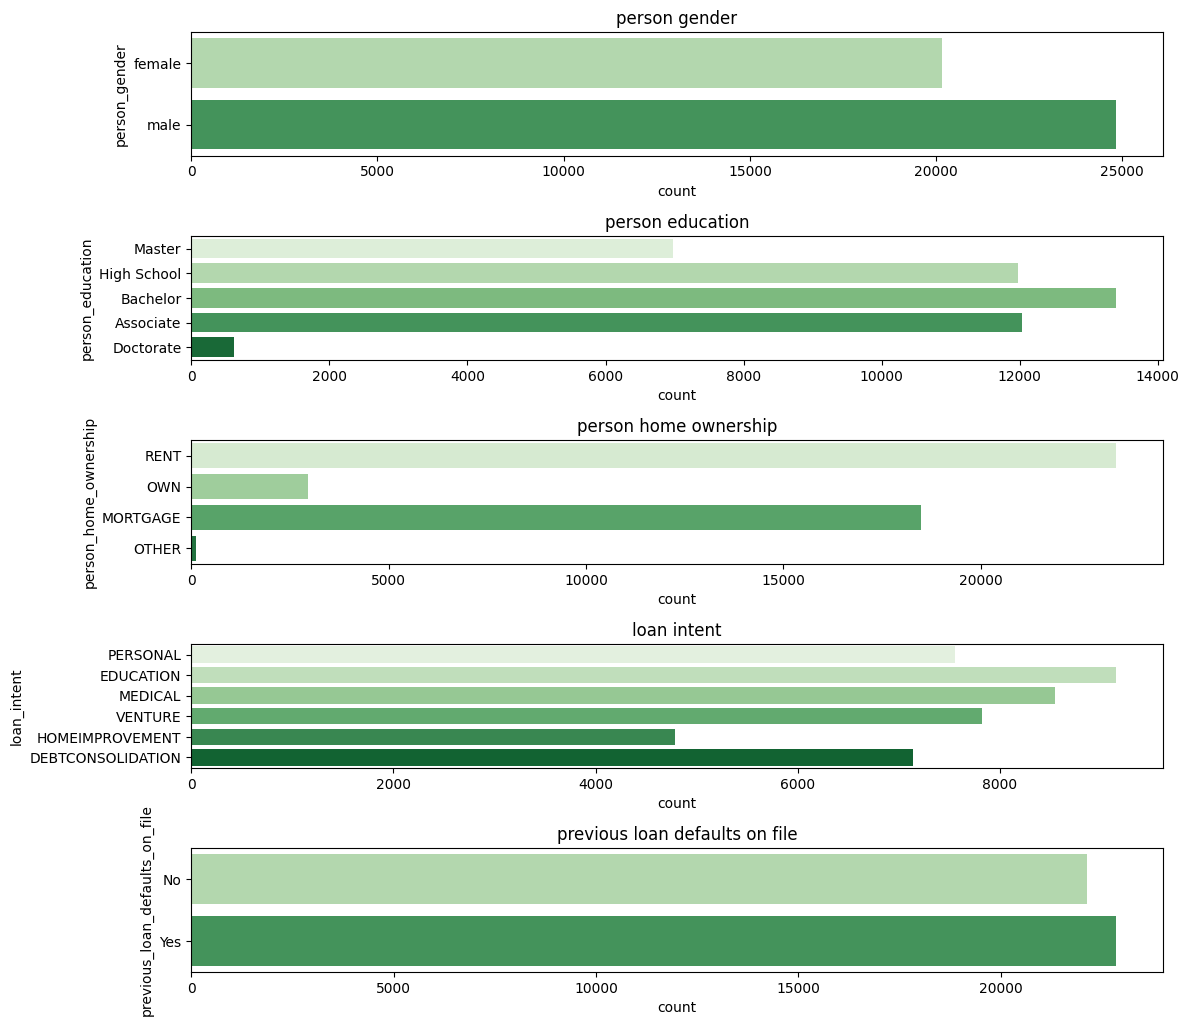

In [99]:
plot_Histcategorical(df, categorical_columns)

In [100]:
def plot_boxPlot(data,columns):
    plt.figure(figsize=(10,12))

    for i,column in enumerate(columns):
        plt.subplot(4,2,i+1)
        sns.boxplot(x=column, data=df, color='lightgreen')
        plt.title(column.replace('_',' '))
    plt.tight_layout()
    plt.show()

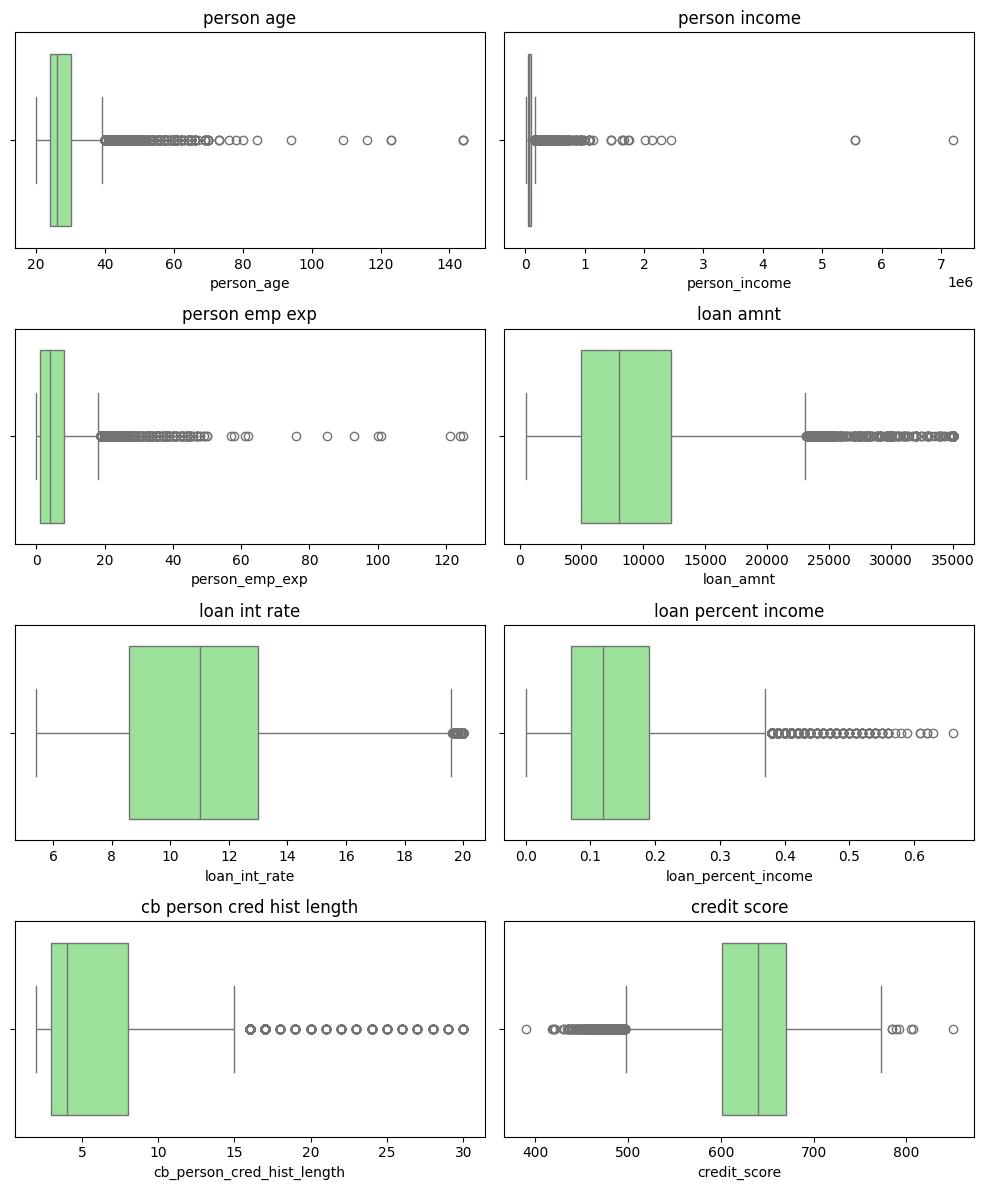

In [101]:
plot_boxPlot(df, numerical_columns)

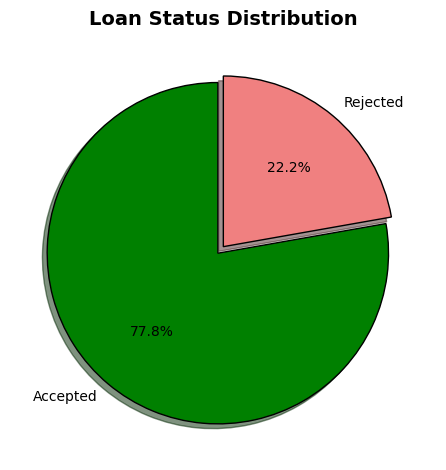

In [102]:
df['loan_status'].value_counts().plot.pie(
    startangle=90,
    autopct='%1.1f%%',
    labels=['Accepted', 'Rejected'],
    colors=['green', 'lightcoral'],
    explode=[0.05, 0],  
    shadow=True,        
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}  
)

plt.title('Loan Status Distribution', fontsize=14, fontweight='bold') 
plt.ylabel('')  
plt.tight_layout()  
plt.show()

In [103]:
def count_withTarget(df, columns):
    plt.figure(figsize=(12,14))

    for i,column in enumerate(columns):
        plt.subplot(4,2,i+1)
        sns.countplot(data=df, x=column, hue=df['loan_status'], palette='Greens')
        plt.title(column.capitalize().replace('_',' '))
        plt.legend(labels=['0=Rejected', '1=Accepted'])
    plt.tight_layout()
    plt.show()

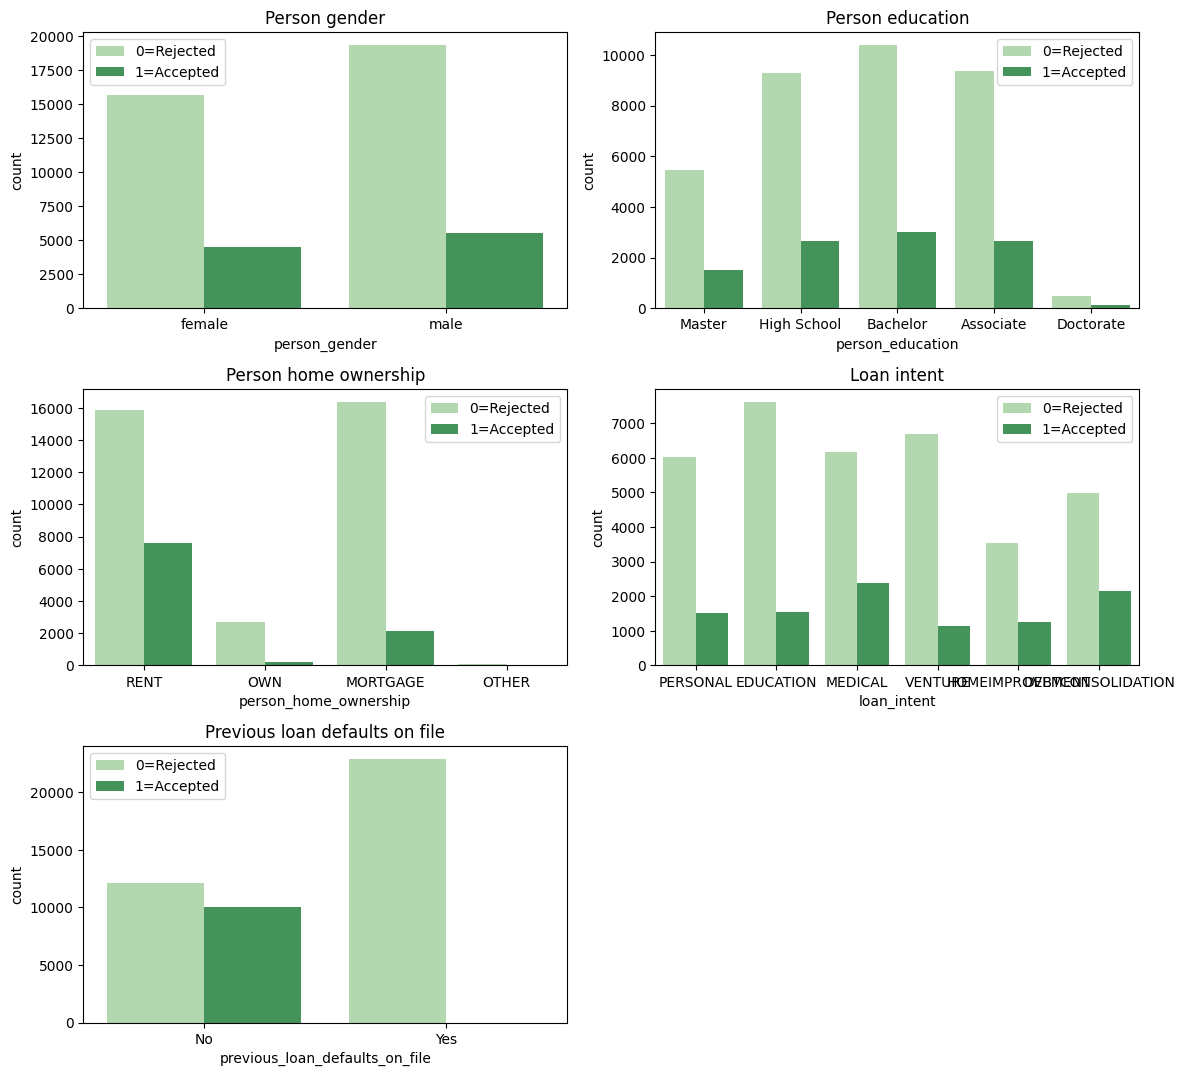

In [104]:
count_withTarget(df, categorical_columns)


In [105]:
df['person_age'].describe()


count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

In [106]:
med = df['person_age'].median()
print(med)

26.0


In [107]:
df['person_age']=df['person_age'].apply(lambda x: med if x>100 else x)
df['person_age'].describe()

count    45000.000000
mean        27.748156
std          5.909318
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64

In [108]:
df['person_emp_exp'].describe()

count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64

In [109]:
emp_med = df['person_emp_exp'].median()
df['person_emp_exp']=df['person_emp_exp'].apply(lambda x: emp_med if x>90 else x)
df['person_emp_exp'].describe()

count    45000.000000
mean         5.396111
std          5.938589
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max         85.000000
Name: person_emp_exp, dtype: float64

In [110]:
df['credit_score'].describe()

count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64

In [111]:
df['person_gender'] = df['person_gender'].map({'female':0, 'male':1})
df['previous_loan_defaults_on_file']=df['previous_loan_defaults_on_file'].map({'No':0,'Yes':1})

In [112]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [113]:
scaler=StandardScaler()
label=LabelEncoder()
ohe_encoder=OneHotEncoder(drop='first')

In [114]:
df['person_education'] = label.fit_transform(df['person_education'])

In [115]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1


In [116]:
num_features=['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
ohe_features=['person_home_ownership', 'loan_intent']

In [117]:
transformer = ColumnTransformer([
    ('scaler', scaler, num_features),
    ('ohe', ohe_encoder, ohe_features)
],
    remainder='passthrough'
)

In [118]:
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1


In [119]:
X=df.drop('loan_status', axis=1)
y=df['loan_status']

In [120]:
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6.0,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,0
44996,37.0,0,0,65800.0,17.0,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,0
44997,33.0,1,0,56942.0,7.0,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,0
44998,29.0,1,1,33164.0,4.0,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,0


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report,confusion_matrix

In [122]:
lr_model=LogisticRegression()
rfc_model=RandomForestClassifier()

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [124]:
X_train_transformed=transformer.fit_transform(X_train)
X_test_transformed =transformer.transform(X_test)

In [125]:
X_train

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
25180,34.0,0,1,97265.0,11.0,MORTGAGE,15000.0,PERSONAL,12.73,0.15,9.0,631,0
12555,25.0,1,3,72953.0,3.0,RENT,12000.0,VENTURE,11.86,0.16,4.0,659,1
29153,41.0,0,4,322597.0,18.0,MORTGAGE,24000.0,PERSONAL,10.37,0.07,11.0,683,1
23838,27.0,1,0,94232.0,4.0,RENT,9600.0,EDUCATION,17.14,0.10,7.0,641,0
35686,27.0,1,4,84873.0,7.0,RENT,7059.0,HOMEIMPROVEMENT,12.97,0.08,3.0,706,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,26.0,1,3,88451.0,6.0,MORTGAGE,10625.0,EDUCATION,6.03,0.12,4.0,559,1
44732,25.0,0,3,34772.0,3.0,MORTGAGE,5876.0,HOMEIMPROVEMENT,11.69,0.17,4.0,647,0
38158,33.0,0,0,58317.0,9.0,MORTGAGE,10707.0,VENTURE,10.74,0.18,9.0,652,1
860,26.0,1,4,178602.0,6.0,RENT,20000.0,DEBTCONSOLIDATION,17.99,0.11,3.0,604,0


In [126]:
def model_train(model, X_train,X_test,y_train,y_test):
        cv_score=cross_val_score(model, X_train, y_train, cv=5).mean()
        print(f'Cross Validation Score of {model.__class__.__name__}:{cv_score}\n')
        
        model.fit(X_train, y_train)  # Train 
        y_pred=model.predict(X_test)
        
        report=classification_report(y_test, y_pred)
        print(f'Classification Report of {model.__class__.__name__}:\n', report)

        plt.figure(figsize=(5,4))
        cm=confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='.2f', cmap='Greens')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        print(f'Confusion Matrix of {model.__class__.__name__}\n\n')

Cross Validation Score of LogisticRegression:0.8968333333333334

Classification Report of LogisticRegression:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



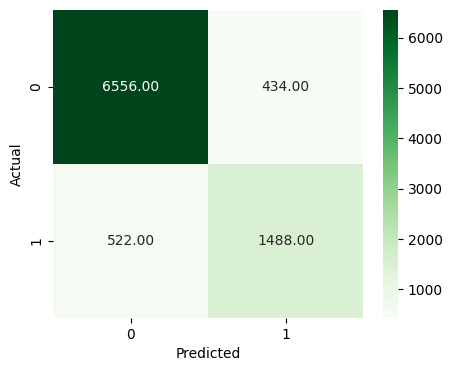

Confusion Matrix of LogisticRegression


Cross Validation Score of RandomForestClassifier:0.9272499999999999

Classification Report of RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.90      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



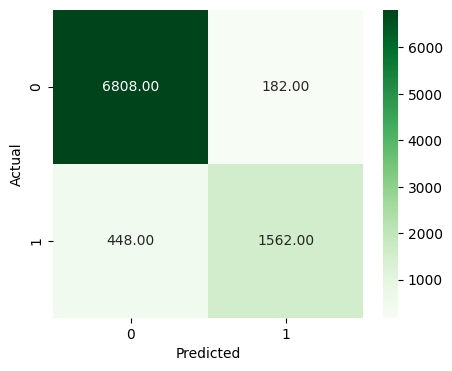

Confusion Matrix of RandomForestClassifier




In [127]:
models = {'LR':lr_model, 'RFC':rfc_model}
for name,model in models.items():
    model_train(model, X_train_transformed, X_test_transformed, y_train, y_test)

In [128]:
import joblib

# Save the transformer
joblib.dump(transformer, 'transformer.pkl')

# Save models
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(rfc_model, 'random_forest_model.pkl')

print("Models and transformer saved successfully!")


Models and transformer saved successfully!
